
<h1>Reconocimiento de símbolos matemáticos escritos a mano </h1>

En la era actual de la digitalización, el reconocimiento de escritura a mano juega un papel importante en la información.
Procesando. Hay mucha información disponible en papel y el procesamiento de archivos digitales es más económico
que procesar archivos en papel tradicionales. El objetivo de un sistema de reconocimiento de escritura a mano es convertir
caracteres escritos a mano en formatos legibles por máquina. Las principales aplicaciones son matrículas de vehículos
reconocimiento, servicios de clasificación de cartas postales, escaneo del sistema de truncamiento de cheques (CTS) e historial
preservación de documentos en departamentos de arqueología, automatización de documentos antiguos en bibliotecas y bancos,
etc. Todas estas áreas se ocupan de grandes bases de datos y, por lo tanto, exigen una alta precisión de reconocimiento, una menor complejidad computacional y un rendimiento constante del sistema de reconocimiento. Se ha sugerido
que las arquitecturas neuronales profundas son más ventajosas que las arquitecturas neuronales superficiales. El campo del aprendizaje profundo está en constante evolución, y algunas de sus variantes son autocodificadores, CNN, redes neuronales recurrentes (RNN), redes neuronales recursivas, creencias profundas redes y máquinas profundas de Boltzmann. Aquí, introducimos una red neuronal convolucional, que es un tipo específico de red neuronal profunda que tiene amplias aplicaciones en la clasificación de imágenes,reconocimiento de objetos, sistemas de recomendación, procesamiento de señales, procesamiento de lenguaje natural, computadora visión y reconocimiento facial. La capacidad de detectar automáticamente las características importantes de un objeto.(aquí un objeto puede ser una imagen, un carácter escrito a mano, un rostro, etc.) sin supervisión humana o la intervención los hace (CNN) más eficientes que sus predecesores (perceptrón multicapa (MLP), etc). La alta capacidad de aprendizaje de características jerárquicas da como resultado una CNN altamente eficiente.

<h1>Algoritmo Arboles de Decisión</h1>

<p>Importando las librerías a utilizar</p>

In [1]:
import os
import pandas as pd
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

<p>Obtenemos la ruta en donde se encuentran las imágenes para después almacenar cada imagen por clase y luego obtener los nombres de los archivos en la carpeta</p>

In [2]:
ruta = './symbols'
imagenes_por_clase = {}
nombres_archivos = os.listdir(ruta)

<p> Iteramos el nombre de cada imagen en el conjunto de datos para obtener la clase de cada nombre del archivo, seguidamente utilizamos la librería OpenCv para leer cada imágen y luego agregarlas a la clase correspondiente</p>

In [3]:
for nombre_archivo in nombres_archivos:
    clase = nombre_archivo.split('-')[0]
    
    ruta_imagen = os.path.join(ruta, nombre_archivo)
    imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
    
    if clase in imagenes_por_clase:
        imagenes_por_clase[clase].append(imagen)
    else:
        imagenes_por_clase[clase] = [imagen]

<p>Convertimos las imágenes en matrices de pixeles y concatenamos las matrices de todas las clases y así poder obtener las etiquetas de las clases. Luego aplicamos el método PCA</p>

In [4]:
matrices_por_clase = {}
for clase, imagenes in imagenes_por_clase.items():
    matrices_por_clase[clase] = [imagen.flatten() for imagen in imagenes]


X = np.concatenate(list(matrices_por_clase.values()))

y = np.concatenate([[clase] * len(matrices) for clase, matrices in matrices_por_clase.items()])

pca = PCA()
X_PCA = pca.fit_transform(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)

<p>Imprimimos en pantalla la gráfica para representar la proporción acumulativa de la varianza explicada por los componentes principales en el análisis de componentes. Al observar la gráfica, puedes determinar cuántos componentes principales necesitas para capturar una cantidad significativa de varianza en tus datos. Esto ayuda a reducir la dimensionalidad del conjunto de datos mientras se mantiene la mayor cantidad posible de información</p>

Variance Explained by all 784 principal components
0.9999999999999997


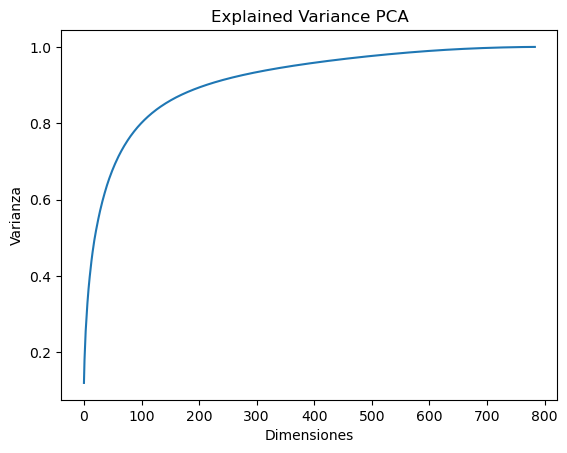

In [5]:
print("Variance Explained by all 784 principal components")
print(sum(pca.explained_variance_ratio_))

plt.plot(cumsum)
plt.xlabel('Dimensiones')
plt.ylabel('Varianza')
plt.title("Explained Variance PCA")
plt.show()

Calculamos con cuantos componentes podemos obtener una buena varianza, la función mostrada calcula y muestra la varianza de los primeros X componentes principales e imprimimos en pantalla los datos obtenidos</p>

In [6]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

print('Variance Captured by First 20 Principal Components: ',
      importanceOfPrincipalComponents.loc[:, 0:19].sum(axis=1).values)
print('Variance Captured by First 50 Principal Components: ',
      importanceOfPrincipalComponents.loc[:, 0:49].sum(axis=1).values)
print('Variance Captured by First 100 Principal Components: ',
      importanceOfPrincipalComponents.loc[:, 0:99].sum(axis=1).values)
print('Variance Captured by First 200 Principal Components: ',
      importanceOfPrincipalComponents.loc[:, 0:199].sum(axis=1).values)
print('Variance Captured by First 300 Principal Components: ',
      importanceOfPrincipalComponents.loc[:, 0:299].sum(axis=1).values)

Variance Captured by First 20 Principal Components:  [0.50220738]
Variance Captured by First 50 Principal Components:  [0.67561419]
Variance Captured by First 100 Principal Components:  [0.79948574]
Variance Captured by First 200 Principal Components:  [0.89326563]
Variance Captured by First 300 Principal Components:  [0.933663]


<p>Implementamos los árboles de decisión para el reconocimiento de las imágenes ya procesadas</p>

In [7]:
X_PCA = pca.fit_transform(X)

X_PCA = X_PCA[:, :299]

X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

<p>Obtenemos las etiquetas únicas de las clases implementadas y creamos el mapa de calor para la matriz de calor utilizando la biblioteca seaborn para mostrar estos gráficos</p>

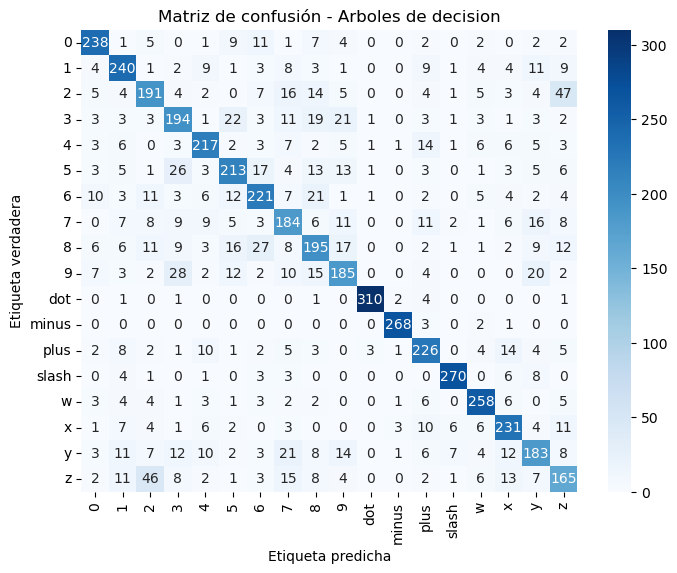

Precisión de arboles de decision: 0.7387037037037038


In [8]:
unique_labels = np.unique(y)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=unique_labels, yticklabels=unique_labels)
plt.title("Matriz de confusión - Arboles de decision")
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta verdadera")
plt.show()

print("Precisión de arboles de decision:", accuracy)

<h1>Algoritmo Random Forest</h1>

<p>Importamos las librerías a utilizar</p>

In [9]:
import os
import pandas as pd
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

<p>Obtenemos la ruta en donde se encuentran las imágenes para después almacenar cada imagen por clase y luego obtener los nombres de los archivos en la carpeta</p>

In [10]:
ruta = './symbols'

imagenes_por_clase = {}

nombres_archivos = os.listdir(ruta)

<p>Iteramos el nombre de cada imagen en el conjunto de datos para obtener la clase de cada nombre del archivo, seguidamente utilizamos la librería OpenCv para leer cada imágen y luego agregarlas a la clase correspondiente</p>

In [11]:
for nombre_archivo in nombres_archivos:
    clase = nombre_archivo.split('-')[0]
    
    ruta_imagen = os.path.join(ruta, nombre_archivo)
    imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
    
    if clase in imagenes_por_clase:
        imagenes_por_clase[clase].append(imagen)
    else:
        imagenes_por_clase[clase] = [imagen]

<p>Convertimos las imágenes en matrices de pixeles y concatenamos las matrices de todas las clases y así poder obtener las etiquetas de las clases. Luego aplicamos el método PCA</p>

In [12]:
matrices_por_clase = {}
for clase, imagenes in imagenes_por_clase.items():
    matrices_por_clase[clase] = [imagen.flatten() for imagen in imagenes]

X = np.concatenate(list(matrices_por_clase.values()))

y = np.concatenate([[clase] * len(matrices) for clase, matrices in matrices_por_clase.items()])

pca = PCA()
X_PCA = pca.fit_transform(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)


Imprimimos en pantalla la gráfica para representar la proporción acumulativa de la varianza explicada por los componentes principales en el análisis de componentes. Al observar la gráfica, puedes determinar cuántos componentes principales necesitas para capturar una cantidad significativa de varianza en tus datos. Esto ayuda a reducir la dimensionalidad del conjunto de datos mientras se mantiene la mayor cantidad posible de información

Variance Explained by all 784 principal components
0.9999999999999997


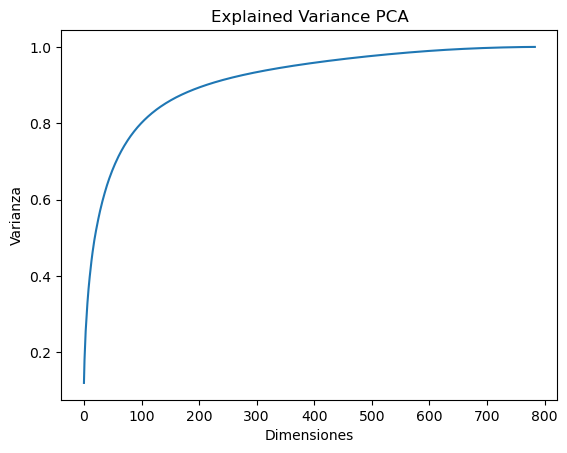

In [13]:

print("Variance Explained by all 784 principal components")
print(sum(pca.explained_variance_ratio_))

plt.plot(cumsum)
plt.xlabel('Dimensiones')
plt.ylabel('Varianza')
plt.title("Explained Variance PCA")
plt.show()

Calculamos con cuantos componentes podemos obtener una buena varianza, la función mostrada calcula y muestra la varianza de los primeros X componentes principales e imprimimos en pantalla los datos obtenidos

In [14]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

print('Variance Captured by First 20 Principal Components: ',
      importanceOfPrincipalComponents.loc[:, 0:19].sum(axis=1).values)
print('Variance Captured by First 50 Principal Components: ',
      importanceOfPrincipalComponents.loc[:, 0:49].sum(axis=1).values)
print('Variance Captured by First 100 Principal Components: ',
      importanceOfPrincipalComponents.loc[:, 0:99].sum(axis=1).values)
print('Variance Captured by First 200 Principal Components: ',
      importanceOfPrincipalComponents.loc[:, 0:199].sum(axis=1).values)
print('Variance Captured by First 300 Principal Components: ',
      importanceOfPrincipalComponents.loc[:, 0:299].sum(axis=1).values)

Variance Captured by First 20 Principal Components:  [0.50220738]
Variance Captured by First 50 Principal Components:  [0.67561419]
Variance Captured by First 100 Principal Components:  [0.79948574]
Variance Captured by First 200 Principal Components:  [0.89326563]
Variance Captured by First 300 Principal Components:  [0.933663]


Después de analizar los mejores valores obtenidos en la varianza se determina que con 300 componentes dicha varianza es mayor a 90 y al aplicar Random Forest se tiene en cuenta que con los primeros 300 componentes dados por PCA. Dividimos los datos en conjuntos de entrenamientos de prueba, creamos un clasificador de Random Forest, entrenamos el clasificador creado, realizamos las predicciones en el conjunto de prueba, calculamos la precisión del clasificador, creamos la matriz de confusión

In [15]:
X_reduced = X_PCA[:, :299]

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.8955555555555555


Obtenemos las etiquetas de clase y visualizamos la matriz de confusión con las respectivas etiquetas

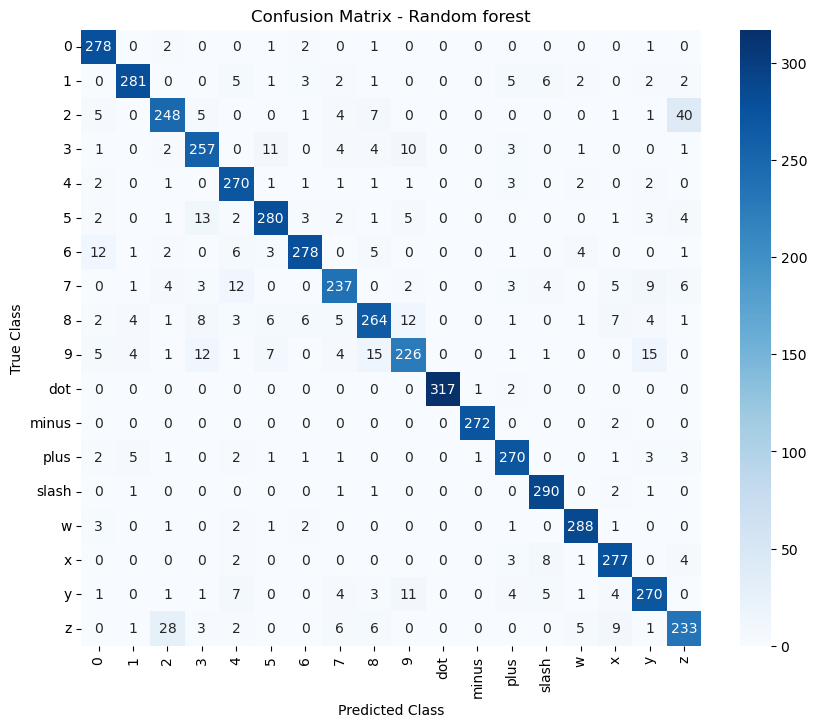

In [16]:
etiquetas_clase = sorted(set(y))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=etiquetas_clase, yticklabels=etiquetas_clase)
plt.title("Confusion Matrix - Random forest")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()